In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import utils as u
import peakutils as pu
from scipy.signal import savgol_filter
#from scipy.optimize import fsolve

In [2]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'
coll=ca.NPYreader(filename,True).get_event()

coll1=coll.subset('ae',0,1.6e-2)
curr1=coll1.get_curr()
trace1=coll1.get_traces()
coll2=coll.subset('ae',1.6e-2)
curr2=coll2.get_curr()
trace2=coll2.get_traces()

print('ok')


ok


<IPython.core.display.Javascript object>


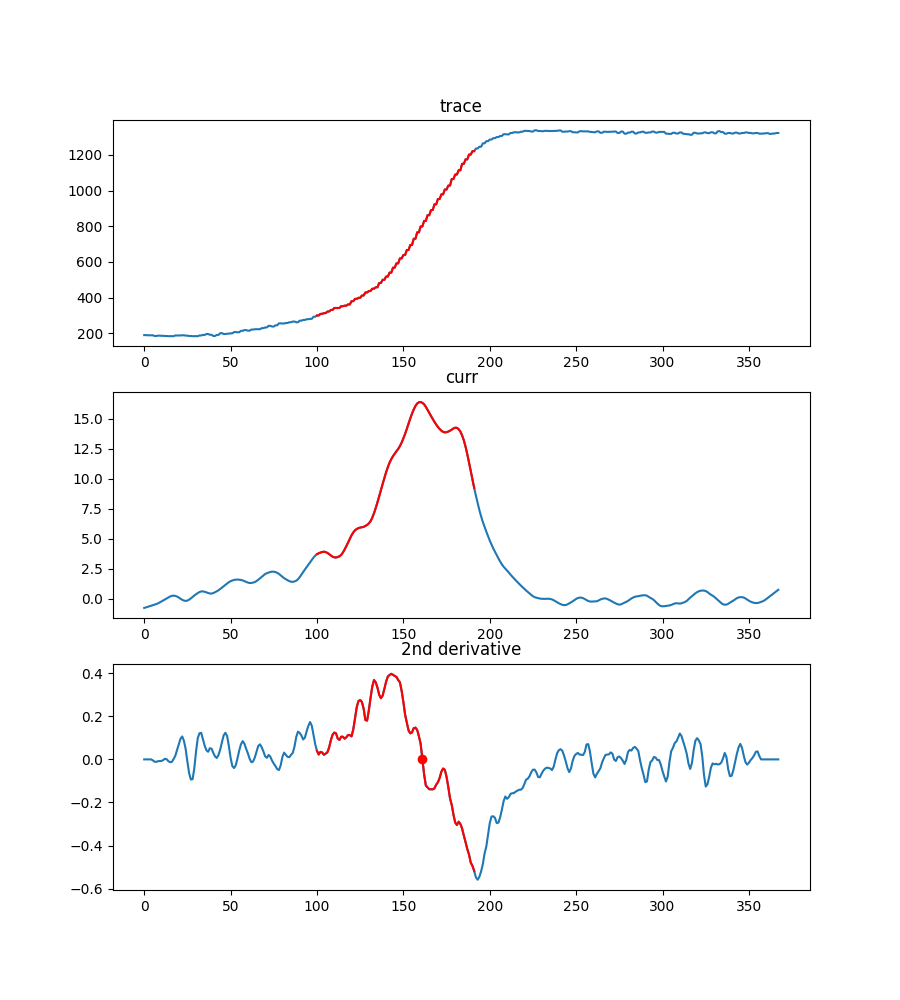

In [3]:
i=5
f=savgol_filter(trace1[i],20,0)
f=savgol_filter(f,10,2,deriv=2)
fig,axs=plt.subplots(3,figsize=(9,10))
axs[0].plot(trace1[i])
axs[0].set_title('trace')
axs[1].plot(curr1[i])
axs[1].set_title('curr')
axs[2].plot(f)
axs[2].set_title('2nd derivative')
plt.show()

In [4]:
rtobj=u.rise_time()
rtobj.compute_rt(trace1[i],4e-9)

x=np.arange(0,len(trace1[i]),1)
axs[0].plot(x[rtobj.i_min : rtobj.i_max],trace1[i][rtobj.i_min : rtobj.i_max],color='r')
axs[1].plot(x[rtobj.i_min : rtobj.i_max],curr1[i][rtobj.i_min : rtobj.i_max],color='r')
axs[2].plot(x[rtobj.i_min : rtobj.i_max],f[rtobj.i_min : rtobj.i_max],color='r')
plt.show()

In [5]:
import re
l=rtobj.i_max-rtobj.i_min
x=np.full(l,1)
y=np.zeros(l)
a=np.where(f[rtobj.i_min : rtobj.i_max]>=0,x,y)
a=str(a)
a=a.translate({ord(i): None for i in '[]. \n'})
n=a.count('01')+a.count('10')

indexes=[]
for match in re.finditer('01',a):
    indexes.append(match.start())
for match in re.finditer('10',a):
    indexes.append(match.start())
    
indexes=indexes+rtobj.i_min

cond=True
while(cond & len(indexes)>1):
    #print('c')
    for i in range(0,len(indexes)-1):
        cond=False
        if indexes[i]>indexes[i+1]-5:
            print(i)
            indexes.pop(i)
            cond=True
            break;
            
print(len(indexes))
    
plt.scatter(indexes,f[indexes],marker='o',color='r')

1


<IPython.core.display.Javascript object>


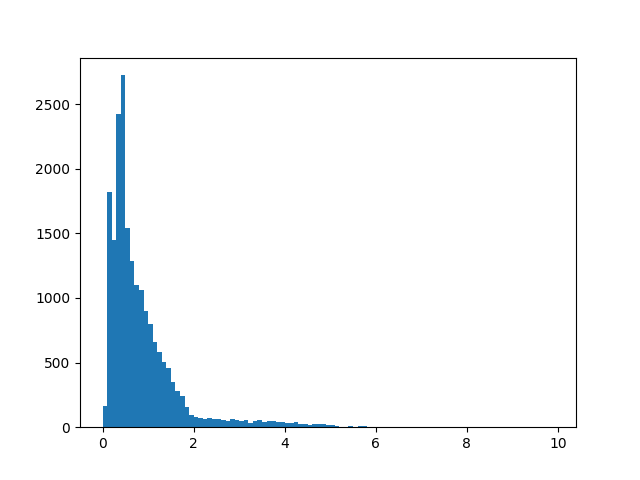

(array([1.650e+02, 1.819e+03, 1.446e+03, 2.420e+03, 2.724e+03, 1.543e+03,
        1.288e+03, 1.104e+03, 1.063e+03, 8.970e+02, 7.990e+02, 6.610e+02,
        5.840e+02, 5.010e+02, 4.600e+02, 3.480e+02, 2.770e+02, 2.440e+02,
        1.580e+02, 9.300e+01, 7.900e+01, 7.000e+01, 6.200e+01, 7.400e+01,
        6.000e+01, 6.600e+01, 5.200e+01, 4.800e+01, 6.300e+01, 5.800e+01,
        4.600e+01, 5.300e+01, 3.500e+01, 4.500e+01, 5.200e+01, 4.000e+01,
        4.600e+01, 4.900e+01, 4.000e+01, 3.700e+01, 3.500e+01, 3.300e+01,
        4.200e+01, 2.800e+01, 2.800e+01, 1.600e+01, 2.600e+01, 2.400e+01,
        2.300e+01, 1.900e+01, 1.600e+01, 1.000e+01, 4.000e+00, 2.000e+00,
        1.000e+01, 4.000e+00, 7.000e+00, 7.000e+00, 4.000e+00, 5.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+0

In [8]:
l2=[]
for i in range(0,len(trace1)):
    f=savgol_filter(trace1[i],20,0)
    f=savgol_filter(f,10,2,deriv=2)
    l2.append(max(f))

plt.figure()
plt.hist(l2,bins=np.arange(0,10,0.1))
    